<a href="https://colab.research.google.com/github/therealellam/CORE_ML_WK1/blob/main/DSC_CORE_MOD2_WK1__ML_Bellah_Ellam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - Exercise 1

## 1. Defining the Question

### a) Specifying the Question


You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### b) Defining the Metric for Success

### c) Understanding the context 

An explanation of the ranking procedure is available here: https://www.fifa.com/fifa-world-ranking/procedure/men.html

A more detailed explanation and history of the rankings is available here:https://en.wikipedia.org/wiki/FIFA_World_Rankings

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Loading the Dataset

df=pd.read_csv('/content/results.csv')

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
df.shape

(40839, 9)

In [4]:
# Previewing the top of our dataset
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
# Previewing the bottom of our dataset
df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [6]:
# Checking whether each column has an appropriate datatype
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


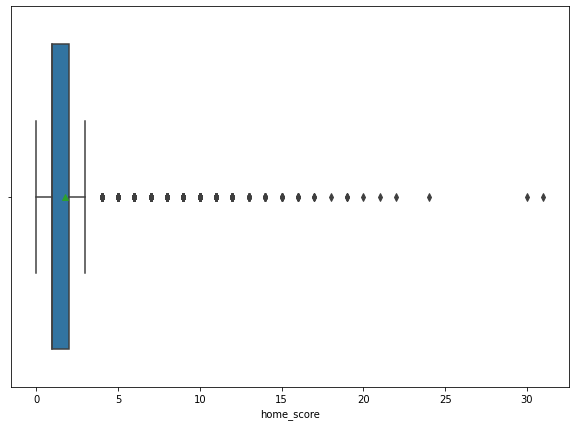

In [7]:
# Checking for Outliers
#
plt.figure(figsize=(10, 7))
sns.boxplot(df["home_score"], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


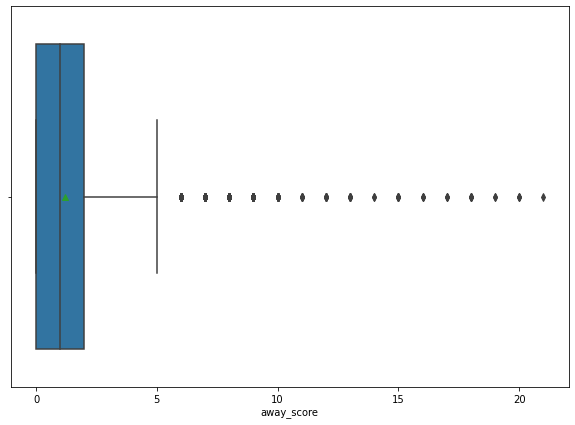

In [8]:
# Checking for Outliers
#
plt.figure(figsize=(10, 7))
sns.boxplot(df["away_score"], showmeans=True)

In [ ]:
# Checking for Anomalies
#

In [9]:
# Identifying the Missing Data
#
df.isnull().values.any()

False

In [ ]:
# Dealing with the Missing Data
#df.isnull().sum()

#df.dropna(inplace=True)
#df.isnull().sum()

In [10]:
# More data cleaning procedures
#
#checking data for duplicates
df.duplicated().values.any()

False

## 6. Exploratory Analysis

In [46]:
import datetime

df['year'] = pd.DatetimeIndex(df['date']).year
df['year']

0        1872
1        1873
2        1874
3        1875
4        1876
         ... 
40834    2019
40835    2019
40836    2019
40837    2019
40838    2019
Name: year, Length: 40839, dtype: int64

In [41]:
# Ploting the univariate summaries and recording our observations


##Defining a function for Univariate visualizations

def uni(data,column,palette):
  new_dt=df.groupby(column)[column].count()
  sns.set_style("whitegrid")
  ax, bar = plt.subplots(figsize=(40,10))
  ax = sns.barplot(x = new_dt.keys(), y = new_dt.values, data=df, palette = palette)
  ax.set_ylabel("Count", fontsize=10)
  ax.set_xlabel(f"{column.title()}", fontsize=10)
  ax.set_title(f"{column.title()}", fontsize=10)
  plt.xticks(rotation=90)
  plt.show()

  return new_dt



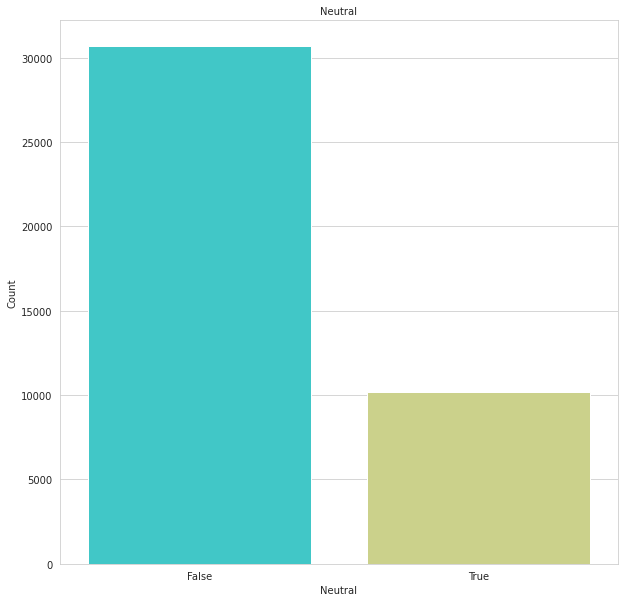

neutral
False    30680
True     10159
Name: neutral, dtype: int64

In [23]:
uni(df,'neutral',palette='rainbow')

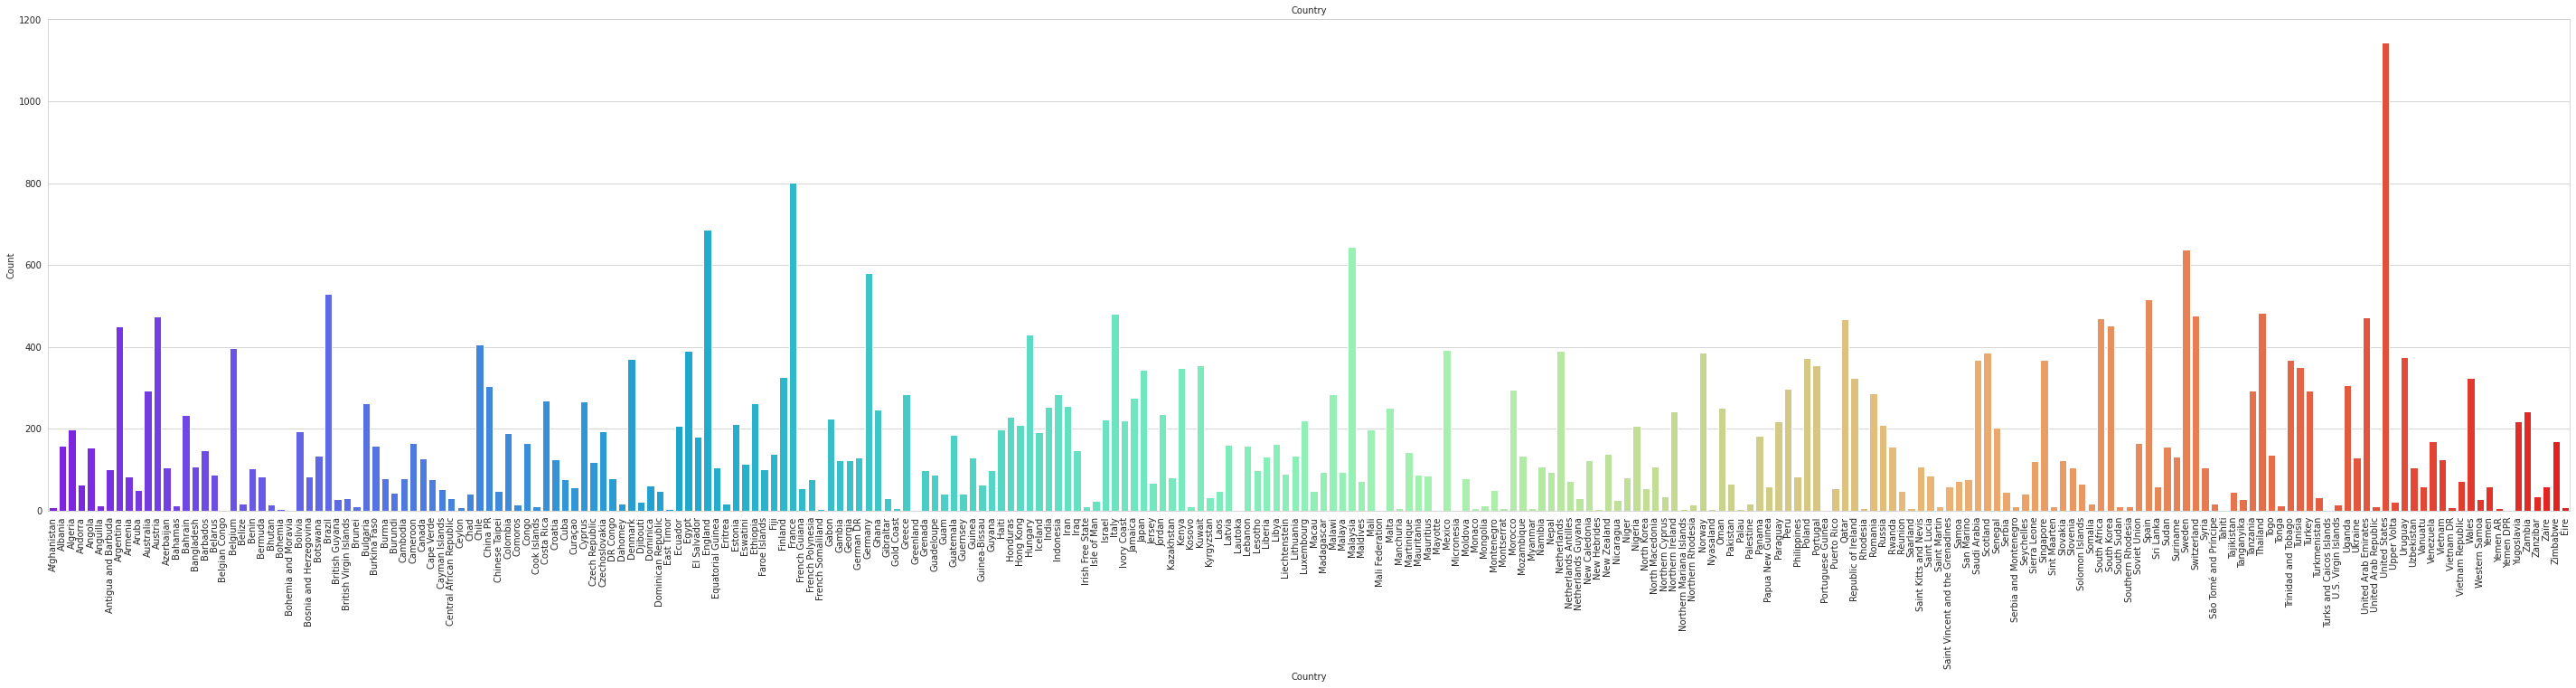

country
Afghanistan      8
Albania        159
Algeria        198
Andorra         62
Angola         153
              ... 
Zambia         241
Zanzibar        34
Zaïre           59
Zimbabwe       170
Éire             7
Name: country, Length: 266, dtype: int64

In [38]:
uni(df,'country',palette='rainbow')

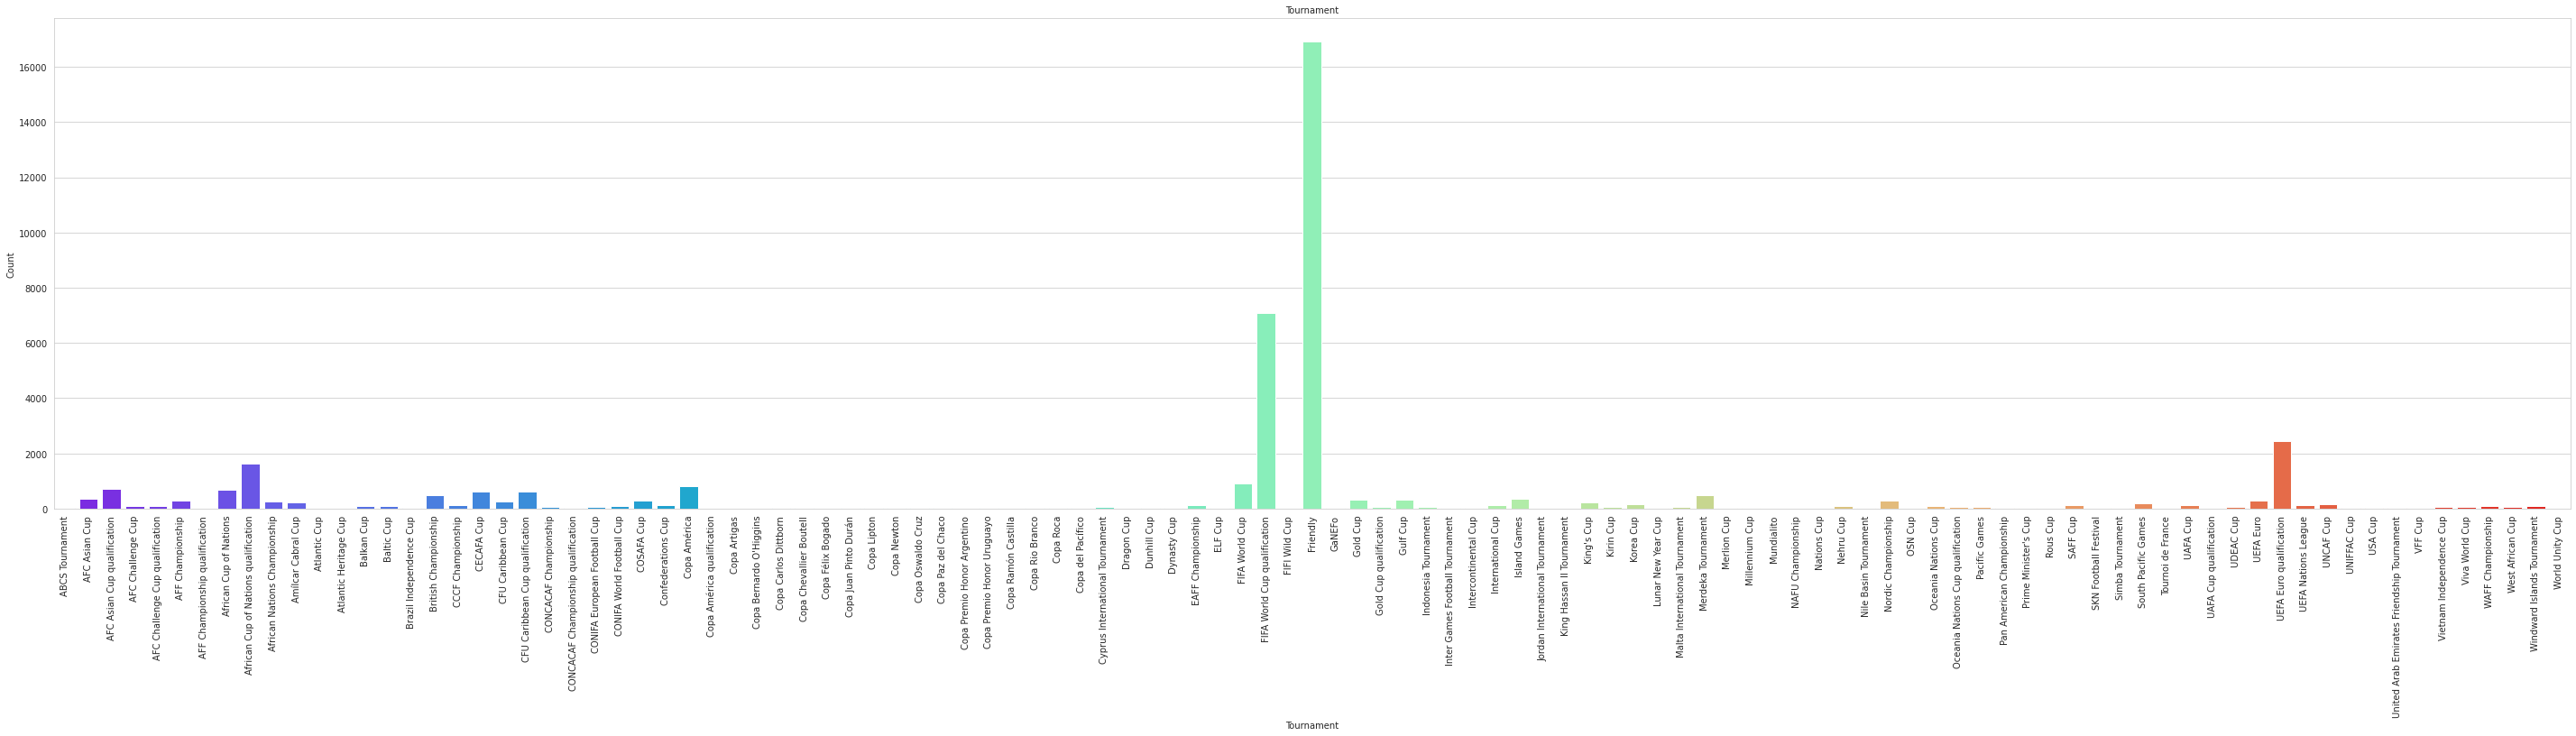

tournament
ABCS Tournament                     20
AFC Asian Cup                      370
AFC Asian Cup qualification        724
AFC Challenge Cup                  100
AFC Challenge Cup qualification     92
                                  ... 
Viva World Cup                      56
WAFF Championship                   97
West African Cup                    54
Windward Islands Tournament        101
World Unity Cup                      4
Name: tournament, Length: 109, dtype: int64

In [39]:
uni(df,'tournament',palette='rainbow')

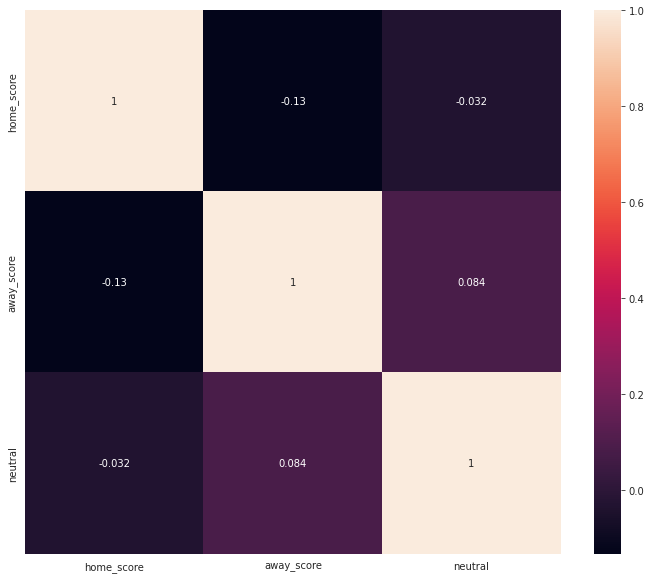

In [30]:
#Bivariate Analysis
#Plotting a heat map to show correlation for all our variables

plt.figure(figsize=(12, 10))

heat_map =df.corr()

sns.heatmap(heat_map,xticklabels = heat_map.columns.values,yticklabels = heat_map.columns.values,annot = True);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


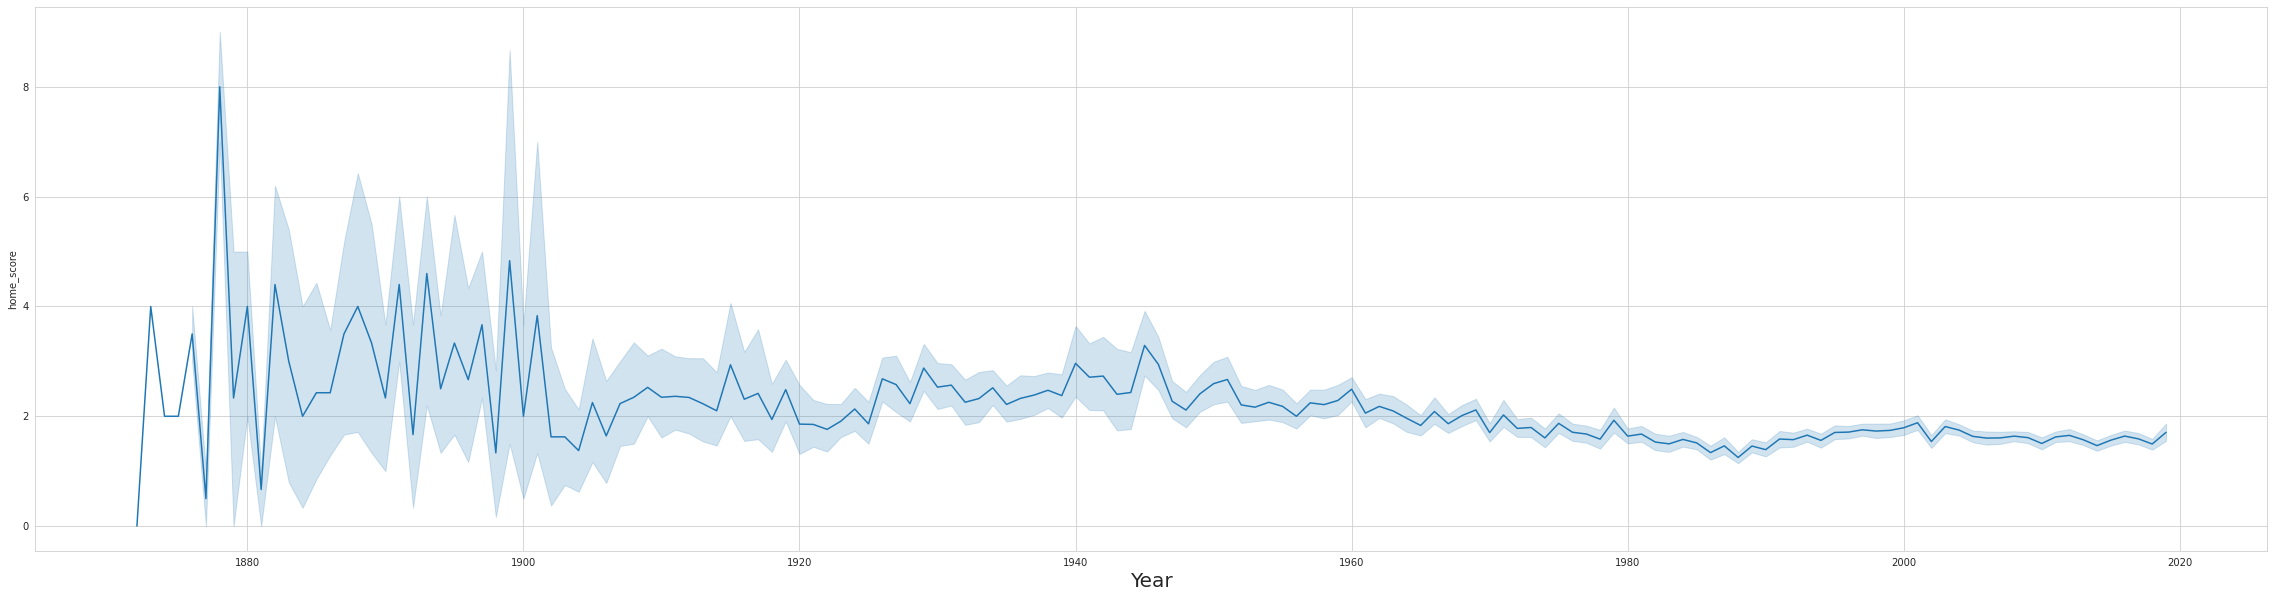

In [51]:
plt.figure(figsize=(40, 10))
sns.lineplot(df['year'],df['home_score'])
plt.xlabel("Year", fontsize=20)
#plt.xticks(rotation=90)
plt.show()

## 7. Future Engineering

In [ ]:
#Imputation
#one-hot encoding




## 8. Checking for Multi-colinearity

In [ ]:
##
##



## 9. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 10. Cross-validation & RMSE's

In [ ]:
##



## 11. Residual Plotting & Heteroscedasticity Test

In [ ]:
##



## 12. Challenging the Solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#